In [2]:
import pandas as pd

# Load your dataset
data = pd.read_csv(r"C:\Users\m\Desktop\Machine Learning project\clean_df2\clean_df2.csv")

# Display the first few rows of the dataset
print(data.head())

  lpep_pickup_datetime lpep_dropoff_datetime  pu_location  do_location  \
0  2018-01-01 00:18:50   2018-01-01 00:24:39          134          159   
1  2018-01-01 00:30:26   2018-01-01 00:46:42          107          109   
2  2018-01-01 00:07:25   2018-01-01 00:19:45          109          138   
3  2018-01-01 00:32:40   2018-01-01 00:33:41          100          100   
4  2018-01-01 00:38:35   2018-01-01 01:08:50          100          141   

   passenger_count  trip_distance  fare_amount  extra  mta_tax  tip_amount  \
0              5.0           0.70          6.0    0.5      0.5         0.0   
1              5.0           3.50         14.5    0.5      0.5         0.0   
2              1.0           2.14         10.0    0.5      0.5         0.0   
3              1.0           0.03          4.5   -0.5     -0.5         0.0   
4              1.0           5.63         21.0    0.5      0.5         0.0   

   ...  vendor_Creative Mobile Technologies, LLC  vendor_VeriFone Inc.  \
0  ...      

In [3]:
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
# Remove duplicate rows
df_no_duplicates = data.drop_duplicates()

Number of duplicate rows: 0


In [4]:
import pandas as pd
import numpy as np

# Load your cleaned dataset
df= df_no_duplicates
# sample_fraction = 0.1  # Adjust this fraction as needed
# data_sample = df.sample(frac=sample_fraction, random_state=42)
df = df.select_dtypes(include=[np.number])

feature_name = "total_amount"

# Define the number of bins (equal to the number of categories)
num_bins = 3

# Discretize the total amount into three categories based on equal frequency binning
df['total_amount_category'] = pd.qcut(df[feature_name], q=num_bins, labels=['high', 'mid', 'low'], duplicates='drop')

# Check the distribution of the categories
print(df['total_amount_category'].value_counts())

total_amount_category
high    279120
low     257018
mid     254667
Name: count, dtype: int64


# Decision Trees
In these 2 models i tuned 6 hyperparamets:
max_depth: Maximum depth of the tree.

min_samples_split: Minimum number of samples required to split an internal node.

min_samples_leaf: Minimum number of samples required to be at a leaf node.

ccp_alpha: Complexity parameter used for Cost-Complexity Pruning.

criterion: gini or entropy

max_features: Number of features to consider when looking for the best split
All THESE HYPERPARAMETERS ARE TUNED TO PREVENT OVERFITTING

Cross-Validation: StartifiedKFold (10 splits) because it ensures that each fold cross contains approximatly the same percentage of samples of each target class.

Hyperparameter Optimization: GridSearchCV with StratifiedKFold 

Feature Scaling: StandardScaler because standardizes features by removing the mean and scaling to unit variance. This is important for algorithms like Decision Trees to ensure that all features contribute equally to the model's decisions and are on the same scale 

In the 1st model i applied regularization and the results were:
Cross-Validation Accuracy: 0.9431
Test Accuracy: 0.9417
more detaied results are below each code 
In the 2nd model i didnt apply regularization and the results were:
Test Accuracy: 0.9838

The model without regularization achieves a significantly higher test accuracy compared to the model with regularization. This is due to the less restrictive hyperparameters (smaller min_samples_split, min_samples_leaf), allowing the model to fit the training data more closely.

Precision, Recall, F1-Score:

With Regularization:
Precision, recall, and f1-scores are slightly lower for all classes, especially for the 'mid' category.
Hyperparameters like higher min_samples_split and min_samples_leaf prevent the model from overfitting by ensuring each split and leaf has a substantial number of samples.
Regularization with ccp_alpha helps in pruning the tree, reducing complexity.


Without Regularization:
Precision, recall, and f1-scores are higher, indicating better performance across all categories.
Less restrictive hyperparameters allow the model to fit the training data more closely, increasing accuracy but also the risk of overfitting.


Finally, the learning curves indicate that the second model generalizes better and achieves higher performance, with cross-validation scores closely matching the training scores and demonstrating initial overfitting that smooths out with more data. In contrast, the first model shows more fluctuations and sensitivity to the amount of training data, indicating potential overfitting and instability in specific data ranges


Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=50; total time=   9.8s
[CV] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=50; total time=  10.5s
[CV] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=50; total time=  10.5s[CV] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=50; total time=  10.6s
[CV] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=50; total time=  10.6s

[CV] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=50; total time=  10.6s
[CV] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=50; total 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   40.0s finished


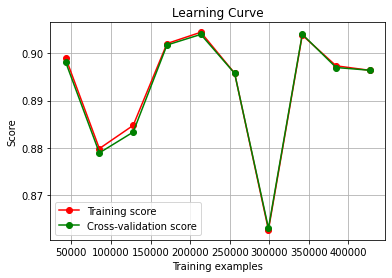

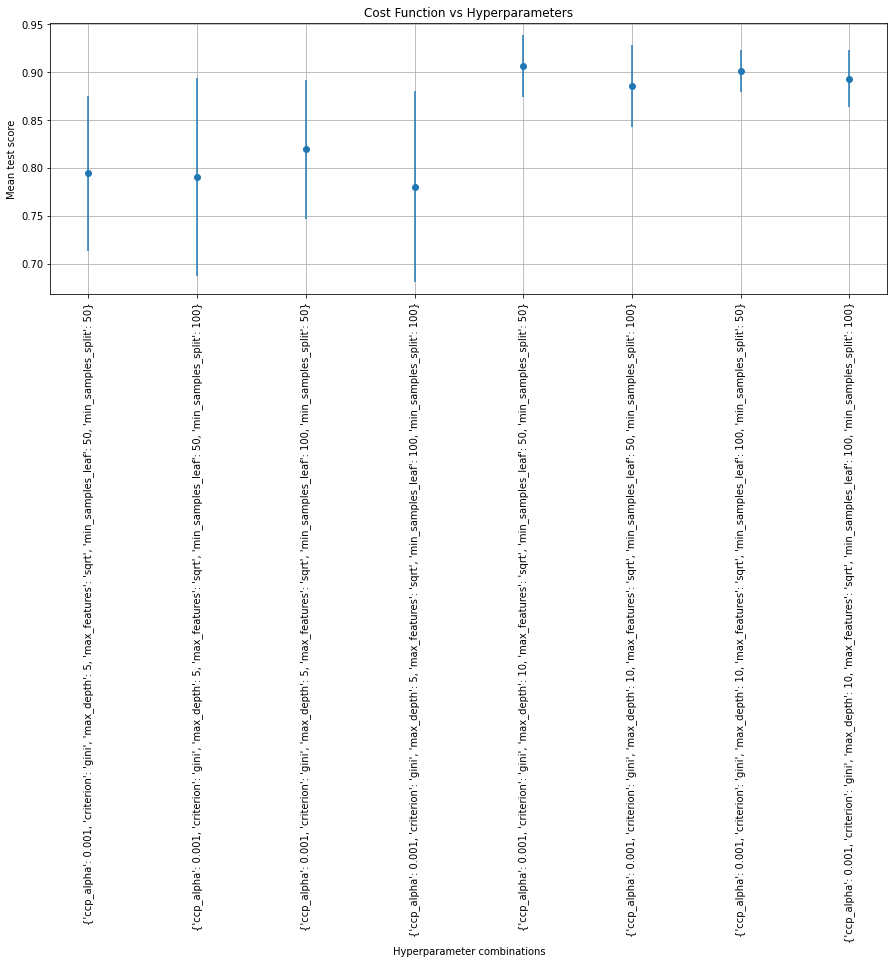

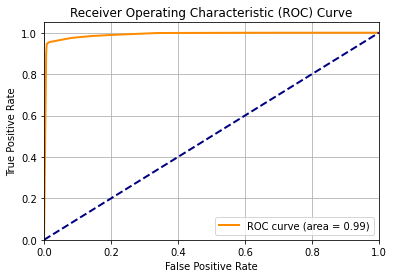

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import joblib

# Load your dataset
# Assuming `df` is your DataFrame containing the data

# Assuming 'total_amount_category' is your target variable and the rest are features
X = df.drop(columns=['total_amount', 'total_amount_category'])
y = df['total_amount_category']

# Split the data into training (60%), cross-validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the fitted scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for tuning with more restrictive parameters to prevent overfitting
param_grid = {
    'max_depth': [5, 10],  # Reduced range to simpler values
    'min_samples_split': [50, 100],  # Higher values to ensure more samples per split
    'min_samples_leaf': [50, 100],  # Higher values to ensure more samples per leaf
    'max_features': ['sqrt'],  # Single value to reduce complexity
    'criterion': ['gini'],  # Single criterion to reduce options
    'ccp_alpha': [0.001]  # Smaller range to focus on slight regularization
}

# Initialize the decision tree classifier with regularization parameters
tree_reg = DecisionTreeClassifier()

# Use StratifiedKFold for cross-validation to ensure class distribution is preserved
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Use GridSearchCV with StratifiedKFold cross-validation to find the best parameters
with joblib.parallel_backend('threading'):  # Change backend to 'threading'
    grid_search_reg = GridSearchCV(estimator=tree_reg, param_grid=param_grid, cv=skf, scoring='accuracy', n_jobs=-1, verbose=2)
    grid_search_reg.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_reg = grid_search_reg.best_params_
print(f"Best parameters with regularization: {best_params_reg}")

# Train the final model using the best parameters on the training set
best_tree_reg = DecisionTreeClassifier(**best_params_reg)
best_tree_reg.fit(X_train_scaled, y_train)

# Evaluate the final model with regularization on the cross-validation set
y_val_pred_reg = best_tree_reg.predict(X_val_scaled)
val_accuracy_reg = accuracy_score(y_val, y_val_pred_reg)
print(f"Cross-Validation Accuracy with regularization: {val_accuracy_reg}")
print(f"Classification Report on Cross-Validation Set with regularization:\n{classification_report(y_val, y_val_pred_reg)}")

# Evaluate the final model with regularization on the test set
y_test_pred_reg = best_tree_reg.predict(X_test_scaled)
test_accuracy_reg = accuracy_score(y_test, y_test_pred_reg)
print(f"Test Accuracy with regularization: {test_accuracy_reg}")
print(f"Classification Report on Test Set with regularization:\n{classification_report(y_test, y_test_pred_reg)}")

# Extract and display all results from GridSearchCV
results = pd.DataFrame(grid_search_reg.cv_results_)
results = results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print("All combinations of hyperparameters and their scores:")
print(results)

# Plotting the learning curve
train_sizes, train_scores, val_scores = learning_curve(
    best_tree_reg, X_train_scaled, y_train, cv=skf, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), verbose=1)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve")
plt.grid()
plt.show()

# Plotting the cost function vs hyperparameters
mean_test_scores = grid_search_reg.cv_results_['mean_test_score']
std_test_scores = grid_search_reg.cv_results_['std_test_score']
params = grid_search_reg.cv_results_['params']

plt.figure(figsize=(15, 5))
plt.errorbar(range(len(mean_test_scores)), mean_test_scores, yerr=std_test_scores, fmt='o')
plt.xticks(range(len(params)), params, rotation=90)
plt.xlabel("Hyperparameter combinations")
plt.ylabel("Mean test score")
plt.title("Cost Function vs Hyperparameters")
plt.grid()
plt.show()

# Plotting the ROC curve
y_test_proba = best_tree_reg.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:, 1], pos_label=best_tree_reg.classes_[1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best parameters: {'ccp_alpha': 0.001, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.9837633803529315
Classification Report on Test Set:
              precision    recall  f1-score   support

        high       0.99      0.99      0.99     56219
         low       0.99      0.98      0.99     51269
         mid       0.97      0.98      0.98     50673

    accuracy                           0.98    158161
   macro avg       0.98      0.98      0.98    158161
weighted avg       0.98      0.98      0.98    158161

[learning_curve] Training set sizes: [ 42703  85406 128110 170813 213517 256220 298923 341627 384330 427034]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


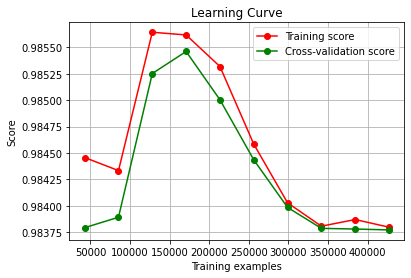

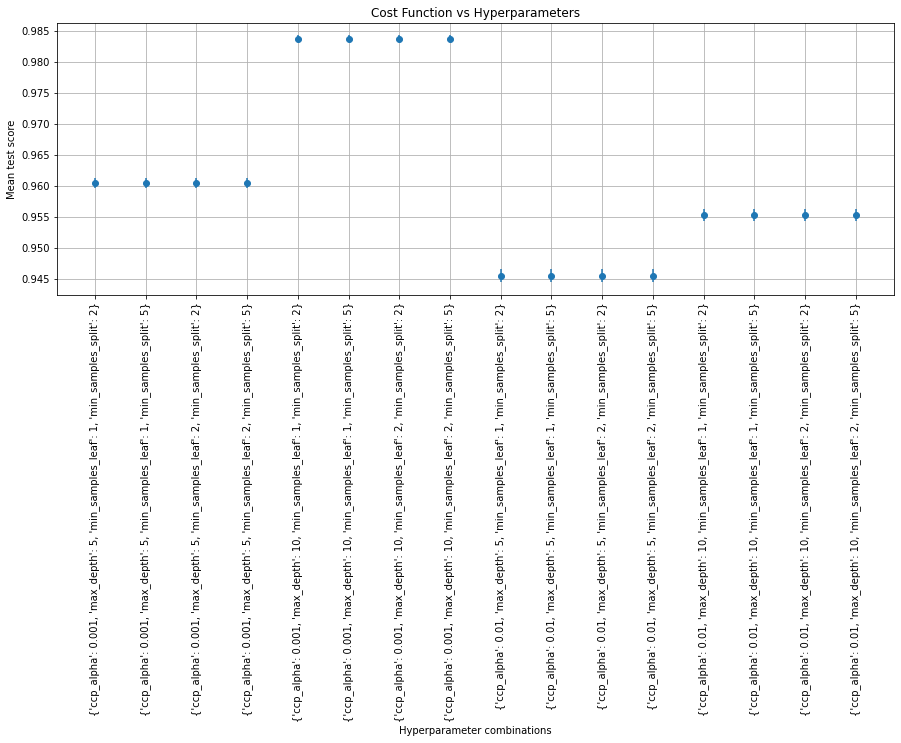

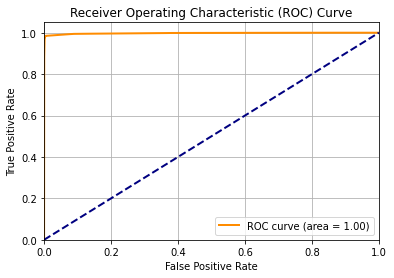

In [9]:
from sklearn.model_selection import StratifiedKFold


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import joblib

# Load your dataset
# Assuming `df` is your DataFrame containing the data

# Assuming 'total_amount_category' is your target variable and the rest are features
X = df.drop(columns=['total_amount', 'total_amount_category'])
y = df['total_amount_category']

# Split the data into training (60%), cross-validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the fitted scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
# Define the parameter grid for tuning
param_grid = {
    'max_depth': [5, 10],  # Reduce the maximum depth
    'min_samples_split': [2, 5],  # Reduce the minimum samples split
    'min_samples_leaf': [1, 2],  # Reduce the minimum samples leaf
    'ccp_alpha': [0.001, 0.01]  # Introduce stricter ccp_alpha for regularization
}

# Initialize the StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Use GridSearchCV with stratified k-fold cross-validation to find the best parameters
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the final model using the best parameters on the full training set
best_tree = DecisionTreeClassifier(**best_params)
best_tree.fit(X_train_scaled, y_train)

# Evaluate the final model on the test set
y_test_pred = best_tree.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")
print(f"Classification Report on Test Set:\n{classification_report(y_test, y_test_pred)}")

# Plotting the learning curve
train_sizes, train_scores, val_scores = learning_curve(
    best_tree, X_train_scaled, y_train, cv=stratified_kfold, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), verbose=1)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve")
plt.grid()
plt.show()

# Plotting the cost function vs hyperparameters
mean_test_scores = grid_search.cv_results_['mean_test_score']
std_test_scores = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

plt.figure(figsize=(15, 5))
plt.errorbar(range(len(mean_test_scores)), mean_test_scores, yerr=std_test_scores, fmt='o')
plt.xticks(range(len(params)), params, rotation=90)
plt.xlabel("Hyperparameter combinations")
plt.ylabel("Mean test score")
plt.title("Cost Function vs Hyperparameters")
plt.grid()
plt.show()

# Plotting the ROC curve
y_test_proba = best_tree.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:, 1], pos_label=best_tree.classes_[1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


# Random Forests

The hyperparameters tunes were :
n_estimators:number of decsion trees

max_depth: Maximum depth of the tree.

min_samples_split: Minimum number of samples required to split an internal node.

min_samples_leaf: Minimum number of samples required to be at a leaf node.

max_feature

criterion: gini or entropy

The results were:
Validation Accuracy: 0.9863
Test Accuracy: 0.9863

Learning curves showed increasing accuracy with the number of training examples, indicating that the model was learning effectively as more data was provided.

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best parameters for Random Forest: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Validation Accuracy for Random Forest: 0.9838139617225485
Classification Report on Validation Set for Random Forest:
              precision    recall  f1-score   support

        high       0.98      0.99      0.99     55759
         low       1.00      0.98      0.99     51579
         mid       0.97      0.98      0.98     50823

    accuracy                           0.98    158161
   macro avg       0.98      0.98      0.98    158161
weighted avg       0.98      0.98      0.98    158161

Test Accuracy for Random Forest: 0.983542086860857
Classification Report on Test Set for Random Forest:
              precision    recall  f1-score   support

        high       0.98      0.99      0.99     56219
         low       1.00      0.98      0.99     51269
         m

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 10.4min finished


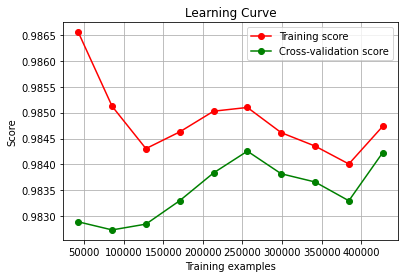

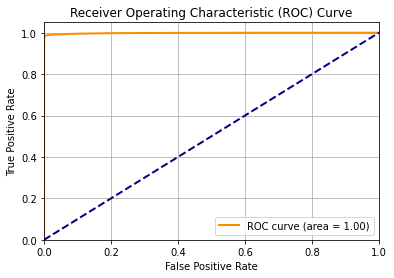

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best parameters for Random Forest: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}
Validation Accuracy for Random Forest: 0.9863114168473897
Classification Report on Validation Set for Random Forest:
              precision    recall  f1-score   support

        high       0.98      1.00      0.99     55759
         low       1.00      0.98      0.99     51579
         mid       0.98      0.98      0.98     50823

    accuracy                           0.99    158161
   macro avg       0.99      0.99      0.99    158161
weighted avg       0.99      0.99      0.99    158161

Test Accuracy for Random Forest: 0.9863177395185918
Classification Report on Test Set for Random Forest:
              precision    recall  f1-score   support

        high       0.99      1.00      0.99     56219
         low       1.00      0.98     

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 21.1min finished


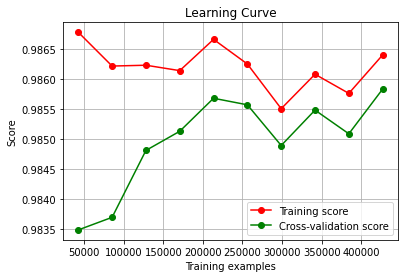

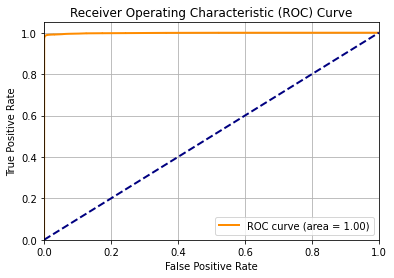

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler

# Load your dataset
# Assuming `df` is your DataFrame containing the data
# Assuming 'total_amount_category' is your target variable and the rest are features
X = df.drop(columns=['total_amount', 'total_amount_category'])
y = df['total_amount_category']

# Split the data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_split': [5],
    'min_samples_leaf': [5],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']  # Add criterion for tuning
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Initialize the StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Use GridSearchCV with stratified k-fold cross-validation to find the best parameters
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print(f"Best parameters for Random Forest: {best_params_rf}")

# Train the final model using the best parameters on the training set
best_rf = RandomForestClassifier(**best_params_rf)
best_rf.fit(X_train_scaled, y_train)

# Evaluate the final model on the validation set
y_val_pred_rf = best_rf.predict(X_val_scaled)
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
print(f"Validation Accuracy for Random Forest: {val_accuracy_rf}")
print(f"Classification Report on Validation Set for Random Forest:\n{classification_report(y_val, y_val_pred_rf)}")

# Evaluate the final model on the test set
y_test_pred_rf = best_rf.predict(X_test_scaled)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Test Accuracy for Random Forest: {test_accuracy_rf}")
print(f"Classification Report on Test Set for Random Forest:\n{classification_report(y_test, y_test_pred_rf)}")

# Extract and display all results from GridSearchCV
results_rf = pd.DataFrame(grid_search_rf.cv_results_)
results_rf = results_rf[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print("All combinations of hyperparameters and their scores for Random Forest:")
print(results_rf)

# Plotting the learning curve
train_sizes, train_scores, val_scores = learning_curve(
    best_rf, X_train_scaled, y_train, cv=stratified_kfold, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), verbose=1)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve")
plt.grid()
plt.show()

# Plotting the ROC curve
y_test_proba_rf = best_rf.predict_proba(X_test_scaled)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_test_proba_rf[:, 1], pos_label=best_rf.classes_[1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


Fitting 5 folds for each of 24 candidates, totalling 120 fits
